In [1]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

### TRAIN
train_v2.csv contains the churn data for March, 2017.

        the train set, containing the user ids and whether they have churned.
        Churn is defined as whether the user did not continue the subscription within 30 days of expiration. 
        is_churn = 1 means churn,
        is_churn = 0 means renewal.

In [2]:
train_input = pd.read_csv('/home/dissertation/data/train_v2.csv', 
                          dtype = {'msno' : 'category'})
train_input.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


0    883630
1     87330
Name: is_churn, dtype: int64


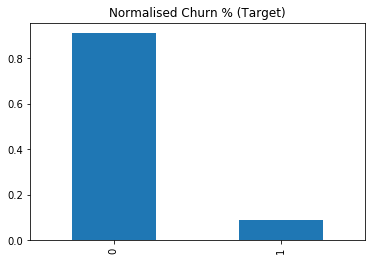

In [3]:
train_input.is_churn\
        .value_counts(dropna=False, normalize=True)\
        .plot(kind='bar', title='Normalised Churn % (Target)')

print(train_input.is_churn.value_counts())

In [5]:
print("Churn Rate: {:.4f}".format(np.mean(train_input.is_churn)))

Churn Rate: 0.0899


In [6]:
train_input.describe(include='all')

,msno,is_churn
count,970960,970960.00
unique,970960,nan
top,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,nan
freq,1,nan
mean,NaN,0.09
std,NaN,0.29
min,NaN,0.00
25%,NaN,0.00
50%,NaN,0.00
75%,NaN,0.00


So we have churn labels for 970960 members

### MEMBERS

In [7]:
members_input = pd.read_csv('/home/dissertation/data/members_v3.csv',
                            dtype={'registered_via' : np.uint8,
                                   'gender' : str})

members_input['registration_init_time_dt'] = pd.to_datetime(members_input['registration_init_time'], 
                                                            format='%Y%m%d', errors='ignore')
members_input['city'] = members_input.city.astype(str)
members_input['registered_via'] = members_input.registered_via.astype(str)

In [7]:
# Reduce the dataset down to the members in the train set only
members_input = pd.merge(train_input['msno'], members_input, on='msno', how='inner')

In [8]:
members_input.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,5,28,male,3,20131223,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,13,20,male,3,20131223,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,13,18,male,3,20131227,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,0,NaN,7,20140109,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,13,35,female,7,20140125,2014-01-25


In [9]:
members_input.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
count,860967,860967,860967.00,388905,860967,860967.00,860967
unique,860967,21,nan,2,5,nan,4749
top,/gsGyq0EHmHoe8rPwH7e5hv71z2AMe4/2lEtsIT7D8w=,1,nan,male,7,nan,2015-10-09 00:00:00
freq,1,442598,nan,204561,462684,nan,1575
first,NaN,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00
last,NaN,NaN,nan,NaN,NaN,nan,2017-04-24 00:00:00
mean,NaN,NaN,13.58,NaN,NaN,20132648.96,NaN
std,NaN,NaN,20.06,NaN,NaN,30111.74,NaN
min,NaN,NaN,-3152.00,NaN,NaN,20040326.00,NaN
25%,NaN,NaN,0.00,NaN,NaN,20120214.00,NaN


In [12]:
members_input.isnull().sum()

msno                              0
city                              0
bd                                0
gender                       472062
registered_via                    0
registration_init_time            0
registration_init_time_dt         0
dtype: int64

#### BD: Age of member

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6fb82f83c8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6fb82f7b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6fb82f8828>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6fb82f7438>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6fb82f7358>],
 'means': []}

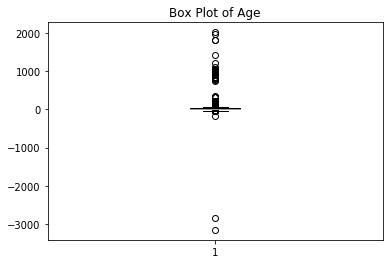

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(members_input['bd'])

In [15]:
upper_q = .99
lower_q = .01
upper_price_outlier = members_input['bd'].quantile(upper_q)
lower_price_outlier = members_input['bd'].quantile(lower_q)
print("Using {0} and {1} quantiles would suggest {2} and {3} as the upper and lower bounds of bd".format(upper_q, lower_q, upper_price_outlier, max(0, lower_price_outlier)))
print("This method would  exclude {0} instances".format(len(members_input[~members_input.bd.between(lower_price_outlier, upper_price_outlier)])))
print("Very inconsistent/noisy data in this feature. Needs to be processed somehow")

Using 0.99 and 0.01 quantiles would suggest 53.0 and 0 as the upper and lower bounds of bd
This method would  exclude 8091 instances
Very inconsistent/noisy data in this feature. Needs to be processed somehow


In [32]:
members_input.head()

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,2011-09-15


#### Categorical Features

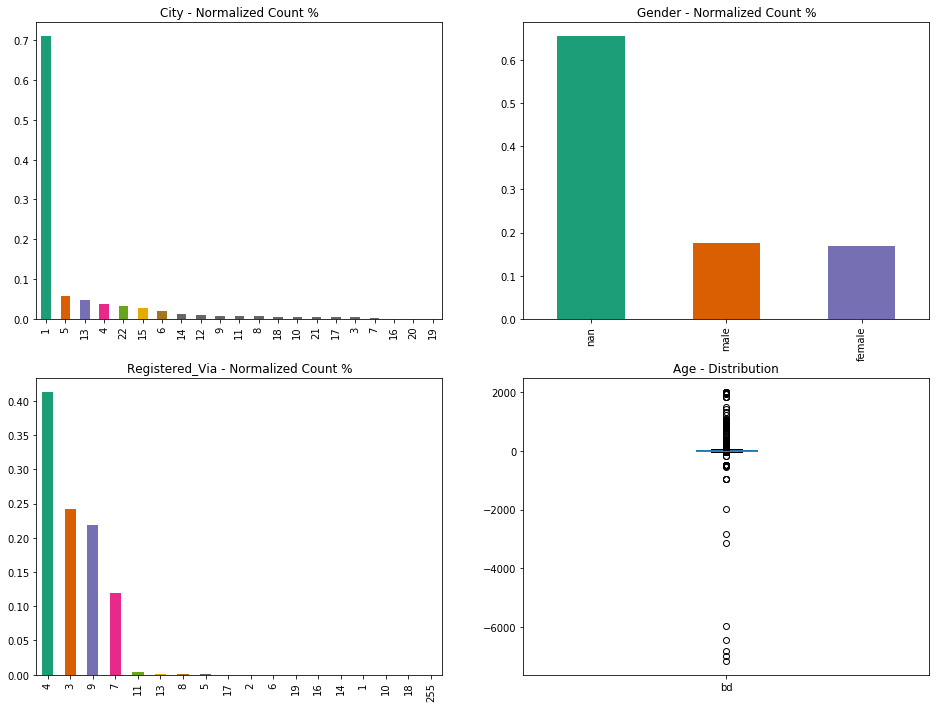

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    
members_input['city'].value_counts(dropna=False, normalize=True).\
                    plot(kind='bar', 
                         color=plt.cm.Dark2(np.arange(len(members_input['city'].unique()))), 
                         title='City - Normalized Count %',
                         ax=axes[0,0])
members_input['gender'].value_counts(dropna=False, normalize=True).\
                    plot(kind='bar', 
                         color=plt.cm.Dark2(np.arange(len(members_input['gender'].unique()))), 
                         title='Gender - Normalized Count %',
                         ax=axes[0,1])
members_input['registered_via'].value_counts(dropna=False, normalize=True).\
                    plot(kind='bar', 
                         color=plt.cm.Dark2(np.arange(len(members_input['registered_via'].unique()))), 
                         title='Registered_Via - Normalized Count %',
                         ax=axes[1,0])
members_input['bd'].plot(kind='box', 
                         title='Age - Distribution',
                         ax=axes[1,1])

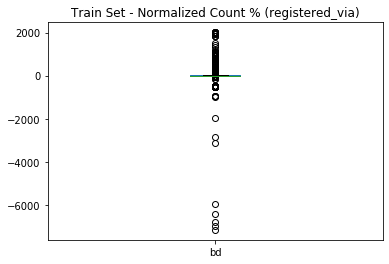

In [36]:
members_input['bd'].plot(kind='box', 
                         #color=plt.cm.Paired(np.arange(len(members_input[col].unique()))), 
                         title='Train Set - Normalized Count % ({0})'.format('registered_via'))

#### Notes:
    msno: 6769473 members in total in the system.
    city [1] is by far the most active city in terms of memberships (>50%)
    A large portion (>60%) of gender information is missing
    There are 4 main popular approaches to registering, [7, 9, 3, 4]. The rest are minimal.
    
    Useful options might be:
        Recode registered_via to ['7', '9', '3', '4', 'Others']
        Replace NaN gender values with 'unknown'. ALso consider removing it as a feature
        City??

#### TRANSACTIONS

In [44]:
## Next load in the transactions data
transactions_input = pd.read_csv('/home/dissertation/data/transactions.csv',
                                 dtype = {'payment_method' : 'category',
                                          'payment_plan_days' : np.uint8,
                                          'plan_list_price' : np.uint8,
                                          'actual_amount_paid': np.uint8,
                                          'is_auto_renew' : np.bool,
                                          'is_cancel' : np.bool})
transactions_input.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,True,20150930,20151101,False
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,True,20150930,20151031,False
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,True,20150930,20160427,False
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,True,20150930,20151128,False
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,True,20150930,20151121,False


In [46]:
# Reduce the dataset down to the members in the train set only
transactions = pd.merge(train_input['msno'], transactions_input, on='msno', how='inner')
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,38,30,149,149,False,20170228,20170330,False
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150331,20150430,False
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150630,20150731,False
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,30,149,149,True,20150902,20150901,True
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,31,0,0,149,True,20150831,20150930,False


In [118]:
transactions.transaction_date.min()

20150101

In [22]:
transactions.membership_expire_date.max()

20170331

#### EDA on Transactions

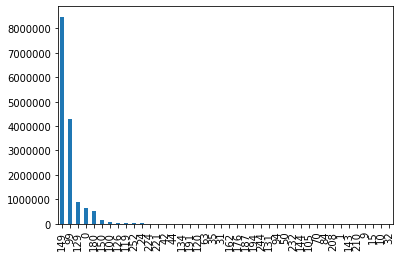

In [23]:
transactions.plan_list_price.value_counts().plot(kind='bar')

In [24]:
transactions.describe(include='all')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,15123586,15123586.00,15123586.00,15123586.00,15123586.00,15123586,15123586.00,15123586.00,15123586
unique,968433,nan,nan,nan,nan,2,nan,nan,2
top,ur5l+RJ9n6L7h96PqgBIOfgFxSM95YzhdrA8xS1NvRQ=,nan,nan,nan,nan,True,nan,nan,False
freq,64,nan,nan,nan,nan,13935880,nan,nan,14875173
mean,NaN,39.16,29.45,128.28,132.88,NaN,20158550.60,20159654.62,NaN
std,NaN,3.34,11.23,36.08,26.98,NaN,6212.03,6881.81,NaN
min,NaN,2.00,0.00,0.00,0.00,NaN,20150101.00,19700101.00,NaN
25%,NaN,39.00,30.00,99.00,99.00,NaN,20151028.00,20151205.00,NaN
50%,NaN,41.00,30.00,149.00,149.00,NaN,20160516.00,20160623.00,NaN
75%,NaN,41.00,30.00,149.00,149.00,NaN,20161023.00,20161126.00,NaN


(array([1.1193e+05, 1.4000e+01, 6.0000e+00, 0.0000e+00, 8.2170e+03,
        0.0000e+00, 3.2320e+03, 0.0000e+00, 5.6970e+03, 1.9300e+02,
        0.0000e+00, 0.0000e+00, 1.9170e+03, 5.3000e+01, 0.0000e+00,
        0.0000e+00, 5.1000e+01, 0.0000e+00, 2.1100e+02, 4.3466e+06,
        6.0000e+01, 0.0000e+00, 0.0000e+00, 2.5293e+05, 0.0000e+00,
        9.3317e+05, 3.0770e+03, 0.0000e+00, 1.2900e+02, 8.9085e+06,
        0.0000e+00, 0.0000e+00, 1.2870e+03, 0.0000e+00, 6.4900e+02,
        5.1524e+05, 0.0000e+00, 3.0720e+03, 4.4200e+02, 0.0000e+00,
        0.0000e+00, 4.3000e+01, 0.0000e+00, 3.8270e+03, 6.5030e+03,
        0.0000e+00, 1.7000e+02, 0.0000e+00, 3.5500e+02, 1.6050e+04]),
 array([  0.  ,   5.04,  10.08,  15.12,  20.16,  25.2 ,  30.24,  35.28,
         40.32,  45.36,  50.4 ,  55.44,  60.48,  65.52,  70.56,  75.6 ,
         80.64,  85.68,  90.72,  95.76, 100.8 , 105.84, 110.88, 115.92,
        120.96, 126.  , 131.04, 136.08, 141.12, 146.16, 151.2 , 156.24,
        161.28, 166.32, 171.36

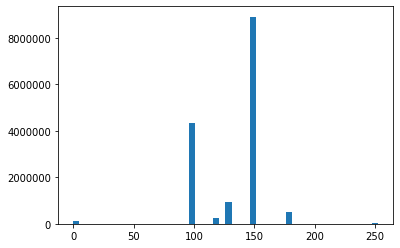

In [25]:
plt.hist(transactions.actual_amount_paid, bins=50)

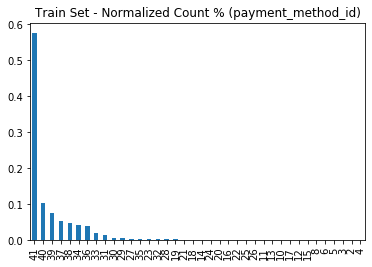

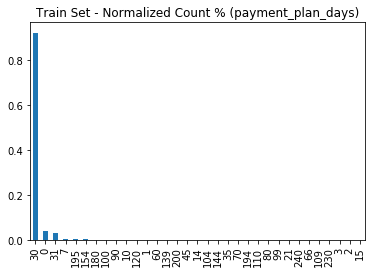

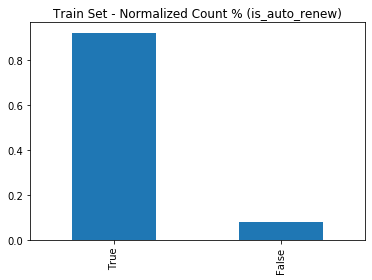

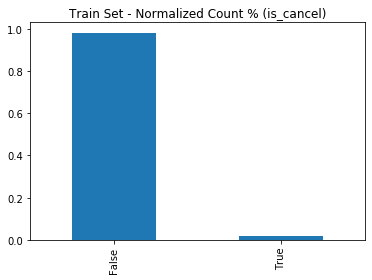

In [47]:
for idx, col in enumerate(['payment_method_id','payment_plan_days','is_auto_renew','is_cancel']):
    plt.figure()
    transactions[col].value_counts(dropna=False, normalize=True).plot(kind='bar', title='Train Set - Normalized Count % ({0})'.format(col))

In [54]:
np.arange(len(transactions['payment_method_id'].unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

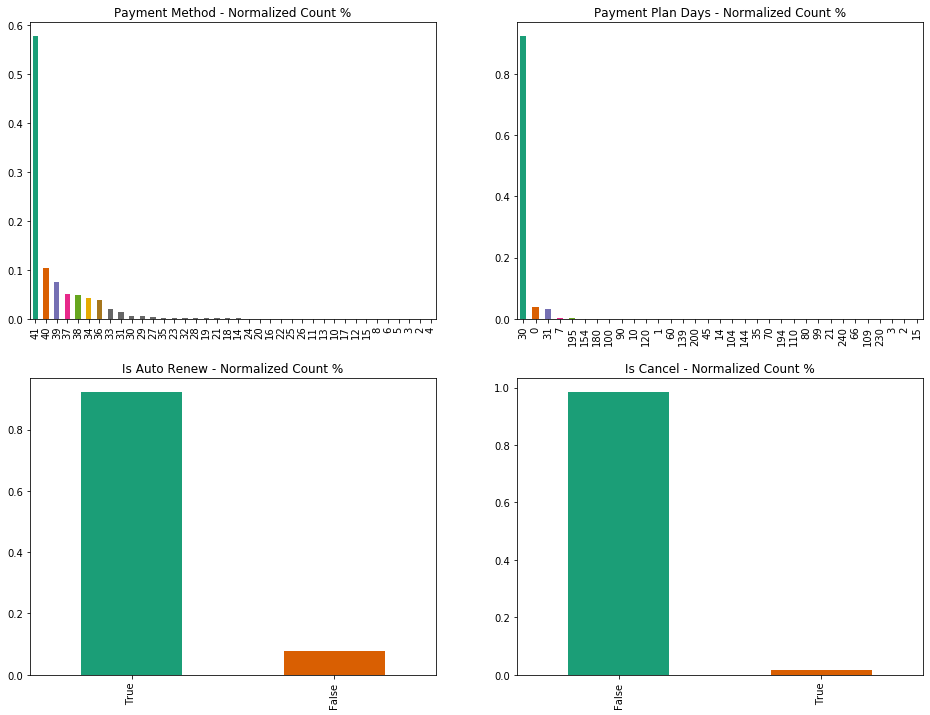

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    
transactions['payment_method_id'].value_counts(dropna=False, normalize=True).\
                    plot(kind='bar', 
                         color=plt.cm.Dark2(np.arange(len(transactions['payment_method_id'].unique()))), 
                         title='Payment Method - Normalized Count %',
                         ax=axes[0,0])
transactions['payment_plan_days'].value_counts(dropna=False, normalize=True).\
                    plot(kind='bar', 
                         color=plt.cm.Dark2(np.arange(len(transactions['payment_plan_days'].unique()))), 
                         title='Payment Plan Days - Normalized Count %',
                         ax=axes[0,1])
transactions['is_auto_renew'].value_counts(dropna=False, normalize=True).\
                    plot(kind='bar', 
                         color=plt.cm.Dark2(np.arange(len(transactions['is_auto_renew'].unique()))), 
                         title='Is Auto Renew - Normalized Count %',
                         ax=axes[1,0])
transactions['is_cancel'].value_counts(dropna=False, normalize=True).\
                    plot(kind='bar', 
                         color=plt.cm.Dark2(np.arange(len(transactions['is_cancel'].unique()))), 
                         title='Is Cancel - Normalized Count %',
                         ax=axes[1,1])

#### Notes:
    payment_method_id 41 accounts for >50% of all payment types
    most members purchase 30 day plans
    >85% of customers opt to auto_renew 
    >90% have not cancelled their subscription

### Merging train_input and members

In [8]:
merged_input = pd.merge(left=train_input, right=members_input, how='inner', on=['msno'])
merged_input.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,NaN,7,20140109,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125,2014-01-25


In [10]:
len(merged_input)

860967

In [11]:
np.mean(merged_input.is_churn)

0.09460060606271785

In [9]:
merged_input.is_churn.value_counts()

0    779519
1     81448
Name: is_churn, dtype: int64

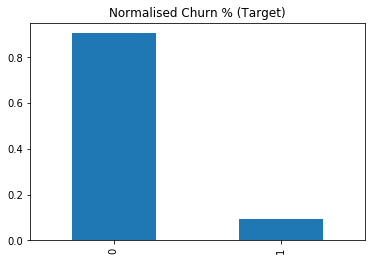

In [14]:
merged_input.is_churn\
        .value_counts(dropna=False, normalize=True)\
        .plot(kind='bar', title='Normalised Churn % (Target)')

In [29]:
merged_input.describe(include='all')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_init_time_dt
count,860967,860967.00,860967,860967.00,388905,860967,860967.00,860967
unique,860967,nan,21,nan,2,5,nan,4749
top,/gsGyq0EHmHoe8rPwH7e5hv71z2AMe4/2lEtsIT7D8w=,nan,1,nan,male,7,nan,2015-10-09 00:00:00
freq,1,nan,442598,nan,204561,462684,nan,1575
first,NaN,nan,NaN,nan,NaN,NaN,nan,2004-03-26 00:00:00
last,NaN,nan,NaN,nan,NaN,NaN,nan,2017-04-24 00:00:00
mean,NaN,0.09,NaN,13.58,NaN,NaN,20132648.96,NaN
std,NaN,0.29,NaN,20.06,NaN,NaN,30111.74,NaN
min,NaN,0.00,NaN,-3152.00,NaN,NaN,20040326.00,NaN
25%,NaN,0.00,NaN,0.00,NaN,NaN,20120214.00,NaN


In [121]:
merged_input['gender'] = merged_input['gender'].astype(str)
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing')).plot(kind='bar', stacked=True)
pd.crosstab(merged_input['gender'].fillna('missing'), 
            merged_input['is_churn'].fillna('missing'), normalize=True)

KeyError: 'gender'

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.boxplot(merged_input[merged_input.bd.between(0,100)]['bd'])

In [ ]:
transactions.isnull().sum()

### Merging Transactions with those members involved in the churn study

In [122]:
len(transactions)

15123586

In [32]:
#transactions[transactions.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']

In [33]:
# %%time
# #[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\

# transactions_merged[transactions_merged.msno == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']\
#         .groupby('msno')\
#         .agg({'msno' : {'total_order' : 'count'},
#                         'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0],
#                                                'payment_method_id_count' : lambda x: len(np.unique(x))},
#                         'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x[x>0].mode()[0],
#                                                'payment_plan_days_mean' : 'mean'},
#                         'plan_list_price' : {'plan_list_price_mean' : 'mean',
#                                              'plan_lifetime_value' : 'sum'},
#                         'actual_amount_paid' : {'actual_amount_mean' : 'mean',
#                                                 'total_actual_amount' : 'sum'},
#                         'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0]},
#                         'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
#                                               'transaction_date_max' : lambda x: x.max()},
#                         'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
#             })

In [34]:
%%time
transactions_summary = \
    transactions\
            .groupby('msno')\
            .agg({'msno' : {'total_order' : 'count'},
                            'payment_method_id' : {'payment_method_id_mode' : lambda x: x.mode()[0] if len(x) > 1 else x,
                                                   'payment_method_id_count' : lambda x: len(np.unique(x))},
                            'payment_plan_days' : {'payment_plan_days_mode' : lambda x: x.mode()[0] if len(x) > 1 else x
                                                   ,
                                                   'payment_plan_days_mean' : 'mean'},
                            'plan_list_price' : {'plan_list_price_mean' : 'mean',
                                                 'plan_lifetime_value' : 'sum'},
                            'actual_amount_paid' : {'actual_amount_mean' : 'mean',
                                                    'total_actual_amount' : 'sum'},
                            'is_auto_renew' : {'is_auto_renew_mode' : lambda x : x.mode()[0] if len(x) > 1 else x},
                            'transaction_date' : {'transaction_date_min' : lambda x: x.min(),
                                                  'transaction_date_max' : lambda x: x.max()},
                            'is_cancel' : {'cancel_times' : lambda x : sum(x==1)}
                })
        
transactions_summary.columns = transactions_summary.columns.droplevel(0)
transactions_summary.reset_index(inplace=True)

/home/anaconda/envs/py373/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


CPU times: user 12min 47s, sys: 11.2 s, total: 12min 58s
Wall time: 12min 37s


In [35]:
transactions_summary.head()

,msno,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,4,41,1,30,30.00,99.00,396.00,99.00,396.00,True,20161116,20170215,0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,19,39,1,30,28.58,141.16,2682.00,149.00,2831.00,True,20150131,20170131,0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,26,41,1,30,28.85,143.27,3725.00,149.00,3874.00,True,20150126,20170226,0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,12,41,1,30,30.00,149.00,1788.00,149.00,1788.00,True,20160315,20170215,0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,19,39,1,30,28.58,141.16,2682.00,149.00,2831.00,True,20150131,20170131,0


In [39]:
len(transactions_summary)

968433

### What about gender and age

#### Can either impute, drop to re-code. 

In [ ]:
# FOr this the simple approach will be taken, Gender will be dropped

In [37]:
merged_input.drop(['gender'], axis=1, inplace=True)
merged_input.head()

,msno,is_churn,city,bd,registered_via,registration_init_time,registration_init_time_dt
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,3,20131223,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,3,20131223,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,3,20131227,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,7,20140109,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,7,20140125,2014-01-25


In [ ]:
# Age will be restricted to 0 and 90 ... 
#Removing about 634 records

In [40]:
print('Removing all aged not between 0..90 will lose {} records'.format(len(merged_input[~merged_input.bd.between(0,90)])))

Removing all aged not between 0..90 will lose 634 records


In [41]:
#Everything below 0 and above 90 is junk
merged_input = merged_input[merged_input.bd.between(0,90)]

In [42]:
len(merged_input[merged_input.bd == 0])

473729

### Whats null now

In [43]:
merged_input.isnull().sum()

msno                         0
is_churn                     0
city                         0
bd                           0
registered_via               0
registration_init_time       0
registration_init_time_dt    0
dtype: int64

In [44]:
merged_input.describe(include='all')

,msno,is_churn,city,bd,registered_via,registration_init_time,registration_init_time_dt
count,860333,860333.00,860333,860333.00,860333,860333.00,860333
unique,860333,nan,21,nan,5,nan,4749
top,/gsGyq0EHmHoe8rPwH7e5hv71z2AMe4/2lEtsIT7D8w=,nan,1,nan,7,nan,2015-10-09 00:00:00
freq,1,nan,442554,nan,462595,nan,1574
first,NaN,nan,NaN,nan,NaN,nan,2004-03-26 00:00:00
last,NaN,nan,NaN,nan,NaN,nan,2017-04-24 00:00:00
mean,NaN,0.09,NaN,13.43,NaN,20132655.07,NaN
std,NaN,0.29,NaN,16.01,NaN,30108.85,NaN
min,NaN,0.00,NaN,0.00,NaN,20040326.00,NaN
25%,NaN,0.00,NaN,0.00,NaN,20120214.00,NaN


In [45]:
transactions_summary.isnull().sum()

msno                       0
total_order                0
payment_method_id_mode     0
payment_method_id_count    0
payment_plan_days_mode     0
payment_plan_days_mean     0
plan_list_price_mean       0
plan_lifetime_value        0
actual_amount_mean         0
total_actual_amount        0
is_auto_renew_mode         0
transaction_date_min       0
transaction_date_max       0
cancel_times               0
dtype: int64

In [46]:
transactions_summary.describe(include='all')

,msno,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times
count,968433,968433.00,968433.00,968433.00,968433.00,968433.00,968433.00,968433.00,968433.00,968433.00,968433,968433.00,968433.00,968433.00
unique,968433,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,nan,nan
top,/gsGyq0EHmHoe8rPwH7e5hv71z2AMe4/2lEtsIT7D8w=,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,846605,nan,nan,nan
mean,NaN,15.62,38.94,1.18,31.85,31.88,127.01,2003.36,129.72,2075.18,NaN,20154902.11,20169892.06,0.26
std,NaN,8.52,3.66,0.48,16.14,16.90,27.13,1216.60,28.47,1279.80,NaN,6028.26,1749.14,0.56
min,NaN,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,20150101.00,20150102.00,0.00
25%,NaN,8.00,38.00,1.00,30.00,28.89,99.00,923.00,99.00,900.00,NaN,20150131.00,20170205.00,0.00
50%,NaN,16.00,41.00,1.00,30.00,30.00,131.76,1788.00,139.07,1788.00,NaN,20150919.00,20170214.00,0.00
75%,NaN,22.00,41.00,1.00,30.00,30.00,149.00,3030.00,149.00,3278.00,NaN,20160519.00,20170223.00,0.00


In [49]:
len(transactions_summary)

968433

In [47]:
base_abt = pd.merge(left = merged_input,
                    right = transactions_summary,
                    how = 'inner',
                    on='msno')

print(base_abt.shape)
base_abt.head()

(858301, 20)


,msno,is_churn,city,bd,registered_via,registration_init_time,registration_init_time_dt,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,3,20131223,2013-12-23,6,31,2,0,10.00,49.67,298.00,149.00,894.00,True,20150331,20170228,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,3,20131223,2013-12-23,5,38,3,30,25.40,125.40,627.00,125.40,627.00,False,20160303,20170210,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,3,20131227,2013-12-27,18,38,1,30,30.00,149.00,2682.00,149.00,2682.00,False,20150819,20170130,0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,7,20140109,2014-01-09,19,41,2,30,25.63,125.47,2384.00,141.16,2682.00,True,20150108,20160225,3
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,7,20140125,2014-01-25,24,41,1,30,26.25,105.38,2529.00,123.17,2956.00,True,20150124,20160901,2


In [50]:
base_abt.dtypes

msno                                 object
is_churn                              int64
city                                 object
bd                                    int64
registered_via                       object
registration_init_time                int64
registration_init_time_dt    datetime64[ns]
total_order                           int64
payment_method_id_mode                int64
payment_method_id_count               int64
payment_plan_days_mode                uint8
payment_plan_days_mean              float64
plan_list_price_mean                float64
plan_lifetime_value                 float64
actual_amount_mean                  float64
total_actual_amount                 float64
is_auto_renew_mode                     bool
transaction_date_min                  int64
transaction_date_max                  int64
cancel_times                          int64
dtype: object

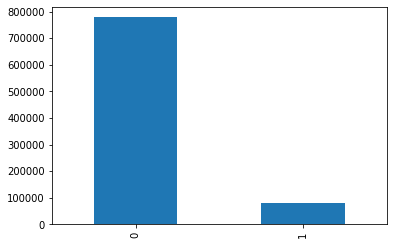

In [53]:
base_abt.is_churn.value_counts().plot(kind='bar')

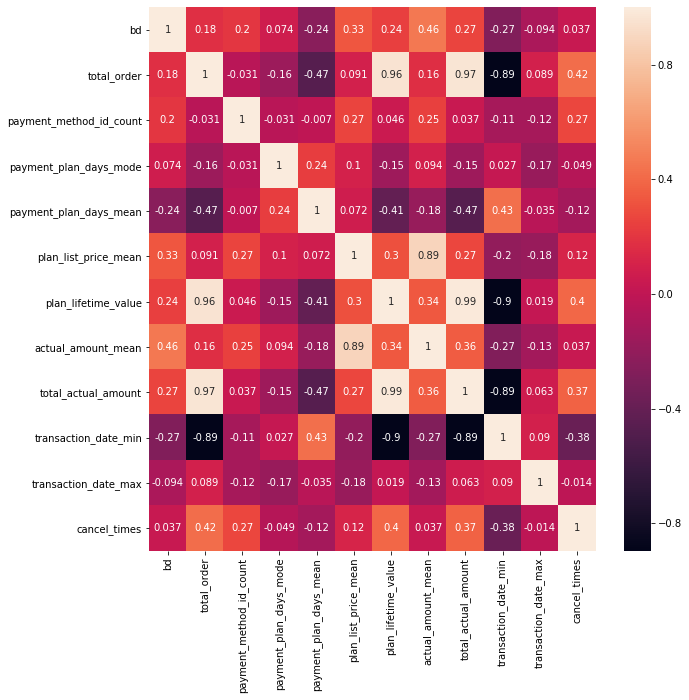

In [54]:
import seaborn as sns

# calculate the correlation matrix using spearman as some of the distributions are not normal.
df_corr = base_abt[['bd', 'total_order', 'payment_method_id_count', 'payment_plan_days_mode', 'payment_plan_days_mean', \
                    'plan_list_price_mean', 'plan_lifetime_value', 'actual_amount_mean', 'total_actual_amount', \
                    'transaction_date_min', 'transaction_date_max', 'cancel_times']]\
                .corr('spearman')

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True)

    total_actual_amount and plan_lifetime_value are near perfectly correlated. 
    transaction_date_min is highly correlated with a number of variables also
    actual_amount_mean is highly correlated with plan_list_price_mean

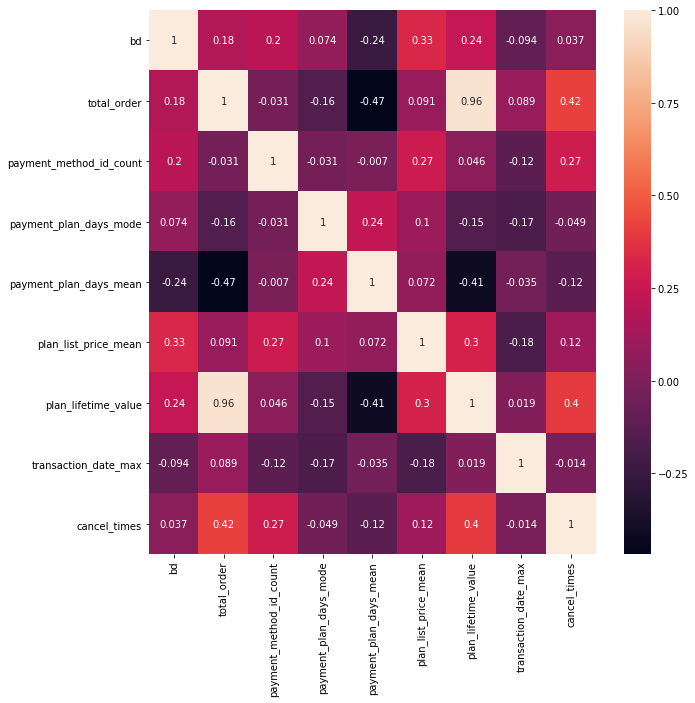

In [55]:
# calculate the correlation matrix using spearman as some of the distributions are not normal.
df_corr = base_abt[['bd', 'total_order', 'payment_method_id_count', 'payment_plan_days_mode', 'payment_plan_days_mean', \
                    'plan_list_price_mean', 'plan_lifetime_value', \
                    'transaction_date_max', 'cancel_times']]\
                .corr('spearman')

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True)

In [56]:
data_prepared = base_abt.drop(['total_actual_amount', 'transaction_date_min', 'actual_amount_mean'], axis=1)
data_prepared.head()

,msno,is_churn,city,bd,registered_via,registration_init_time,registration_init_time_dt,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,is_auto_renew_mode,transaction_date_max,cancel_times
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,3,20131223,2013-12-23,6,31,2,0,10.00,49.67,298.00,True,20170228,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,3,20131223,2013-12-23,5,38,3,30,25.40,125.40,627.00,False,20170210,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,3,20131227,2013-12-27,18,38,1,30,30.00,149.00,2682.00,False,20170130,0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,7,20140109,2014-01-09,19,41,2,30,25.63,125.47,2384.00,True,20160225,3
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,7,20140125,2014-01-25,24,41,1,30,26.25,105.38,2529.00,True,20160901,2


In [104]:
## These are not used 
data_prepared = data_prepared[~data_prepared.payment_method_id_mode.isin([2,3,4])]

### Split the data to test and train

In [115]:
df = data_prepared.copy()
target_index = df.columns.get_loc("is_churn")
split_ratio = 0.7
r_state = 42

## Finally generate the train-test splits
X_train, X_test, y_train, y_test = train_test_split(df.drop(['is_churn'], axis=1), 
                                                    df.iloc[:, target_index],
                                                    train_size = split_ratio, 
                                                    stratify = df.iloc[:,target_index],
                                                    random_state = r_state)

print("X_train: ", X_train.shape, y_train.shape)
print("X_test: ", X_test.shape, y_test.shape)

X_train:  (600803, 16) (600803,)
X_test:  (257487, 16) (257487,)


In [116]:
store = pd.HDFStore('/home/dissertation/data/base_abt_split.h5')
store['X_train'] = X_train   # write to HDF5
store['X_test'] = X_test   # write to HDF5
store['y_train'] = y_train   # write to HDF5
store['y_test'] = y_test   # write to HDF5
store.close()

In [2]:
store = pd.HDFStore('/home/dissertation/data/base_abt_split.h5')
X_train, X_test, y_train, y_test = store['X_train'], store['X_test'], store['y_train'], store['y_test']
store.close()

In [8]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)

In [ ]:
print("PRE-SAMPLING:", X_train.shape, y_train.shape, Counter(y_train))
## This will fit the provided sampling approach to the training data 
X_train, y_train = sampler.fit_resample(X_train, y_train)
print("POST-SAMPLING:", X_train.shape, y_train.shape, Counter(y_train))

In [4]:
y_train.head()

703741    0
228194    0
735733    0
774256    0
282188    0
Name: is_churn, dtype: int64

In [5]:
X_train['is_churn'] = y_train
X_test['is_churn'] = y_test

In [6]:
dataset = pd.concat([X_train, X_test])
dataset.head()

,msno,city,bd,registered_via,registration_init_time,registration_init_time_dt,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,is_auto_renew_mode,transaction_date_max,cancel_times,is_churn
703741,k5508nHWp+WmOeQTuChB4ETVmbhFmA+7E0qgK1uXKEg=,4,32,3,20130407,2013-04-07,22,33,1,30,21.82,108.36,2384.00,True,20170228,0,0
228194,WiRqDxpeBqgkDSqd3kRG/VgZbbDUh7yjxHquuY+iVbY=,13,33,3,20131125,2013-11-25,19,39,1,30,28.58,141.16,2682.00,True,20170131,0,0
735733,YVVOQPk0x2NeB3WqLgc9Sp1R8rIbaWDAnXAZFOf7rlY=,15,22,3,20150705,2015-07-05,17,40,3,30,30.00,158.12,2688.00,True,20170210,4,0
774256,pm07iNhaXPZ3On4cr4xyL4qOETYWikeemBOHZKhvzYI=,1,0,7,20140806,2014-08-06,26,41,1,30,28.85,143.27,3725.00,True,20170205,0,0
282188,MboyMUzNIj6LN+wDrZai6uLE3XQ0ReA79JSMNZfkLgk=,1,0,7,20121026,2012-10-26,27,41,1,30,28.89,132.00,3564.00,True,20170216,1,0


In [7]:
dataset.to_csv('/tmp/base_dataset.csv', index=False)

### Preserve the same msno member details in all proceeding data prep splits

In [117]:
store = pd.HDFStore('/home/dissertation/data/msno_train_test_split.h5')
store['train_msno'] = X_train['msno']   # write to HDF5
store['test_msno'] = X_test['msno']   # write to HDF5
store.close()